# Higher order numerical differentiation #

We have the formula for the first derivative approximation:
$$f^\prime (x)\approx \frac{f(x+h)-f(x)}{h}$$
This is due to the Taylor series expansion:
$$
f(x+h)=f(x)+f{^\prime} (x)\frac{h}{1}+
f^{\prime\prime} (x)\frac{h^2}{2!}+
f^{\prime\prime\prime} (x)\frac{h^3}{3!}+\cdots 
$$
and for the above formula, we ignore terms $o(h^2)$. 

We can approximate the second derivative as follows. We take the formulae:
$$f(x+h)\approx f(x)+f^\prime (x){h}+f^{\prime\prime} (x)\frac{h^2}{2!}$$
$$f(x-h)\approx f(x)-f^\prime (x){h}+f^{\prime\prime} (x)\frac{h^2}{2!}$$
We can think of this as two equations in the two unknowns $f^\prime (x)$ and $f^{\prime\prime} (x)$, where we are
really interested in the solution of $f^{\prime\prime} (x)$. This trivially solved because we can add the equations and eliminate the $f^\prime (x)$ term. 
$$
f(x+h)+f(x-h)=2f(x)+f^{\prime\prime} (x)h^2
$$
or 
$$
f^{\prime\prime} (x)=\frac{f(x+h)+f(x-h)-2f(x) }{h^2 }
$$
This result is fairly well known. How about the higher derivatives?


We write the equations in matrix form:
$$
\left(\begin{array}{cc}
h & \frac{h^{2}}{2!}\\
-h & \frac{h^{2}}{2!}
\end{array}\right)
\left(\begin{array}{c}
f^{\prime}(x)\\
f^{\prime\prime}(x)
\end{array}\right)
=
\left(\begin{array}{c}
f(x+h)-f(x)\\
f(x-h)-f(x)
\end{array}\right)
$$
so
$$
\left(\begin{array}{c}
f^{\prime}(x)\\
f^{\prime\prime}(x)
\end{array}\right)
=
\left(\begin{array}{cc}
h & \frac{h^{2}}{2!}\\
-h & \frac{h^{2}}{2!}
\end{array}\right)^{-1}
\left(\begin{array}{c}
f(x+h)-f(x)\\
f(x-h)-f(x)
\end{array}\right)
$$


We could use sympy to solve for these variables.


In [35]:
# borrowed code from https://stackoverflow.com/questions/4239205/inverse-of-a-matrix-in-sympy

import sympy as sym



# Not necessary but gives nice-looking latex output
# More info at: http://docs.sympy.org/latest/tutorial/printing.html
sym.init_printing()

h = sym.symbols('h')

matrix = sym.Matrix([[h, h**2/2],[-h, h**2/2]])

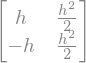

In [36]:
matrix

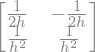

In [39]:
matrix.inv()

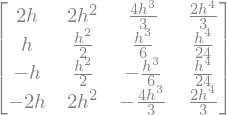

In [41]:
matrix = sym.Matrix([[2*h,(2*h)**2/2,(2*h)**3/6,(2*h)**4/24],
                    [h,h**2/2,h**3/6,h**4/24],
                    [-h,h**2/2,-h**3/6,h**4/24],
                    [-2*h,(2*h)**2/2,-(2*h)**3/6,(2*h)**4/24]])
matrix

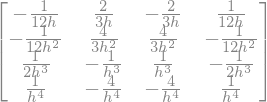

In [42]:
matrix.inv()

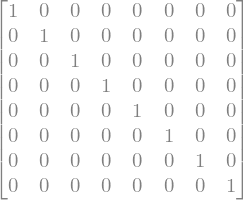

In [51]:
matrix * matrix.inv()

We obtain:
\begin{align*}
f^{\prime\prime\prime\prime}(x) & =\frac{\left(f(x+2h)-f(x)\right)-4\left(f(x+h)-f(x)\right)-4\left(f(x-h)-f(x)\right)+\left(f(x-2h)-f(h)\right)}{h^{4}}\\
 & =\frac{f(x+2h)-4f(x+h)-4f(x-h)+f(x-2h)-6f(x)}{h^{4}}
\end{align*}


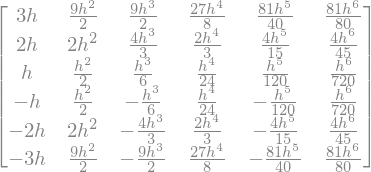

In [46]:
matrix = sym.Matrix([
                    [3*h,(3*h)**2/2,(3*h)**3/6,(3*h)**4/24,(3*h)**5/120,(3*h)**6/720],
                    [2*h,(2*h)**2/2,(2*h)**3/6,(2*h)**4/24,(2*h)**5/120,(2*h)**6/720],
                    [h,h**2/2,h**3/6,h**4/24,h**5/120,h**6/720],
                    [-h,h**2/2,-h**3/6,h**4/24,-h**5/120,h**6/720],
                    [-2*h,(2*h)**2/2,-(2*h)**3/6,(2*h)**4/24,-(2*h)**5/120,(2*h)**6/720],
                    [-3*h,(3*h)**2/2,-(3*h)**3/6,(3*h)**4/24,-(3*h)**5/120,(3*h)**6/720],
                    ])
matrix

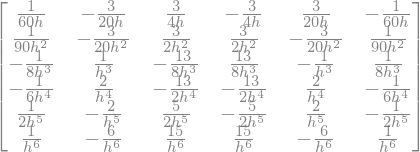

In [47]:
matrix.inv()

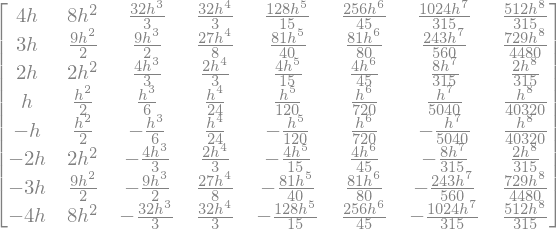

In [49]:
matrix = sym.Matrix([
                    [4*h,(4*h)**2/2,(4*h)**3/6,(4*h)**4/24,(4*h)**5/120,(4*h)**6/720,(4*h)**7/5040,(4*h)**8/40320],
                    [3*h,(3*h)**2/2,(3*h)**3/6,(3*h)**4/24,(3*h)**5/120,(3*h)**6/720,(3*h)**7/5040,(3*h)**8/40320],
                    [2*h,(2*h)**2/2,(2*h)**3/6,(2*h)**4/24,(2*h)**5/120,(2*h)**6/720,(2*h)**7/5040,(2*h)**8/40320],
                    [h,h**2/2,h**3/6,h**4/24,h**5/120,h**6/720,h**7/5040,h**8/40320],
                    [-h,h**2/2,-h**3/6,h**4/24,-h**5/120,h**6/720,-h**7/5040,h**8/40320],
                    [-2*h,(2*h)**2/2,-(2*h)**3/6,(2*h)**4/24,-(2*h)**5/120,(2*h)**6/720,-(2*h)**7/5040,(2*h)**8/40320],
                    [-3*h,(3*h)**2/2,-(3*h)**3/6,(3*h)**4/24,-(3*h)**5/120,(3*h)**6/720,-(3*h)**7/5040,(3*h)**8/40320],
                    [-4*h,(4*h)**2/2,-(4*h)**3/6,(4*h)**4/24,-(4*h)**5/120,(4*h)**6/720,-(4*h)**7/5040,(4*h)**8/40320]
                    ])
matrix

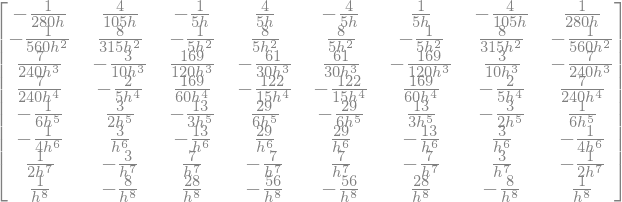

In [50]:
matrix.inv()

|   |    |    |     |     |     |    |    |   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|   |    |    |     | 1   |     |    |    |   |
|   |    |    | 1   | -2  | 1   |    |    |   |
|   |    | 1  | -4  | 6   | -4  | 1  |    |   |
|   | 1  | -6 | 15  | -20 | 15  | -6 | 1  |   |
| 1 | -8 | 28 | -56 | 70  | -56 | 28 | -8 | 1 |


used tableconvert.com

In [2]:
from sympy import *

In [8]:
x,h, Delta = symbols('x, h, Delta')

c = (1/x - 2 + x)/h**2
print(expand(c))
print(expand(c**2))
print(expand(c**3))
print(expand(c**4))

x/h**2 - 2/h**2 + 1/(h**2*x)
x**2/h**4 - 4*x/h**4 + 6/h**4 - 4/(h**4*x) + 1/(h**4*x**2)
x**3/h**6 - 6*x**2/h**6 + 15*x/h**6 - 20/h**6 + 15/(h**6*x) - 6/(h**6*x**2) + 1/(h**6*x**3)
x**4/h**8 - 8*x**3/h**8 + 28*x**2/h**8 - 56*x/h**8 + 70/h**8 - 56/(h**8*x) + 28/(h**8*x**2) - 8/(h**8*x**3) + 1/(h**8*x**4)


In [9]:
d=(Delta-1)
print(expand(d))
print(expand(d**2))
print(expand(d**3))
print(expand(d**4))

Delta - 1
Delta**2 - 2*Delta + 1
Delta**3 - 3*Delta**2 + 3*Delta - 1
Delta**4 - 4*Delta**3 + 6*Delta**2 - 4*Delta + 1


We have the formula:
$$
\frac{d^n}{dx^n} \,f(x)=\lim_{h\to 0}
\frac
{f(x+nh)-\binom{n}{1}f(x+(n-1)h)+\binom{n}{2}f(x+(n-2)h)+\cdots (-1)^k\binom{n}{k}f(x+(n-k) h)+\cdots }
{h^n}
$$

Let us prove it for $n=3$ where:
$$
\lim_{h\to0}\frac{f(x+3h)-3f(x+2h)+3f(x+h)-f(x)}{h^{3}}
$$
is indeterminant limit of type $\frac{0}{0}$. (Note that the
numerator, for $h=0$, is equal to $(1-1)^{3}f(x)=0$. Thus L'Hôpital
rule can be invoked repeatedly with differentiation is with respect
to $h$.
$$
\begin{multline*}
\lim_{h\to0}\frac{f(x+3h)-3f(x+2h)+3f(x+h)-f(x)}{h^{3}}\\
=\lim_{h\to0}\frac{3f^{\prime}(x+3h)-6f^{\prime}(x+2h)+3f^{\prime}(x+h)}{3h^{2}}\\
=\lim_{h\to0}\frac{9f^{\prime\prime}(x+3h)-12f^{\prime\prime}(x+2h)+3f^{\prime\prime}(x+h)}{6h}\\
=\lim_{h\to0}\frac{27f^{\prime\prime\prime}(x+3h)-24f^{\prime\prime\prime}(x+2h)+3f^{\prime\prime\prime}(x+h)}{6}\\
=\frac{27f^{\prime\prime\prime}(x)-24f^{\prime\prime\prime}(x)+3f^{\prime\prime\prime}(x)}{6}=\frac{6f^{\prime\prime\prime}(x)}{6}=f^{\prime\prime\prime}(x)
\end{multline*}
$$


Let us check this out, say, by looking at derivatives of $\sin(x)$ at 1 radians.

In [22]:
def binomial(n, r):
    ''' Binomial coefficient, nCr, aka the "choose" function 
        n! / (r! * (n - r)!)
        borrowed from https://stackoverflow.com/questions/26560726/python-binomial-coefficient
        Most recent 
    '''
    p = 1    
    for i in range(1, min(r, n - r) + 1):
        p *= n
        p //= i
        n -= 1
    return p

# write a function that takes a function f(x) and integer n and gives us the function Delta_n_h

def Delta_n_h(f,n,x,h):
    result = 0.0
    for k in range(n+1):
        result += (-1)**k * binomial(n, k) * f(x+(n-k)*h)
    return result

def my_cube(x):
    return x**3

h = 0.2
print(Delta_n_h(my_cube,2,4,h)/h**2)
h = 0.1
print(Delta_n_h(my_cube,2,4,h)/h**2)
h = 0.05
print(Delta_n_h(my_cube,2,4,h)/h**2)
h = 0.01
print(Delta_n_h(my_cube,2,4,h)/h**2)
h = 0.001
print(Delta_n_h(my_cube,2,4,h)/h**2)
h = 0.0001
print(Delta_n_h(my_cube,2,4,h)/h**2)



25.20000000000024
24.600000000005192
24.299999999999496
24.060000000076798
24.005999947007695
24.000603104923357


In [11]:
math.comb(5,4)

NameError: name 'math' is not defined